In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import pandas_profiling as pp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df=pd.read_csv(r"D:\Datasets\Train_test_iot\Train_Test_IoT_Garage_Door.csv")

df.drop(['ts','date','time','type'],axis=1,inplace=True)

label_encoder=preprocessing.LabelEncoder()
df['door_state']=label_encoder.fit_transform(df['door_state'])
df['sphone_signal']=df['sphone_signal'].str.replace(" ","")
df['sphone_signal']=label_encoder.fit_transform(df['sphone_signal'])

In [3]:
x=df.loc[:,['door_state','sphone_signal']] # input
y=df.loc[:,['label']] # target

# splitting thee dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [4]:
gnb=GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred_gnb=gnb.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_gnb))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_gnb,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_gnb,average='weighted'))

gprecision, grecall, thresholds = precision_recall_curve(y_test, y_pred_gnb)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
#plt.savefig('garage_door_guassian.eps')
#plt.savefig('garage_door_guassian.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [5]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train.values.ravel())
y_pred_mnb=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_mnb))
print("Recall: ",recall_score(y_test,y_pred_mnb,average="weighted"))
print("F1 score: ",f1_score(y_test,y_pred_mnb,average="weighted"))

mprecision, mrecall, thresholds = precision_recall_curve(y_test, y_pred_mnb)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
# plt.savefig('garage_door_multinomial.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  0.5685517704312805
Recall:  0.5685517704312805
F1 score:  0.48108693283862586


In [6]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rfc.fit(x_train,y_train.values.ravel())
y_pred_rfc=rfc.predict(x_test)
# print(y_test)
# print(y_pred)
print("Accuracy: ",accuracy_score(y_test,y_pred_rfc))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_rfc,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_rfc,average='weighted'))

rprecision, rrecall, thresholds = precision_recall_curve(y_test, y_pred_rfc)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
# plt.savefig('garage_door_random.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [7]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=10)
xgb_classifier.fit(x_train,y_train.values.ravel())
y_pred_xgb=xgb_classifier.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_xgb))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_xgb,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_xgb,average='weighted'))

xprecision, xrecall, thresholds = precision_recall_curve(y_test, y_pred_xgb)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
# plt.savefig('garage_door_xgb.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [8]:
model = MLPClassifier(max_iter=100, random_state=42)
model.fit(x_train, y_train.values.ravel())
y_pred_mlp=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_mlp))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_mlp,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_mlp,average='weighted'))

mlprecision, mlrecall, thresholds = precision_recall_curve(y_test, y_pred_mlp)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
# plt.savefig('garage_door_mlp.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [9]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
# Train Adaboost Classifer
abc.fit(x_train, y_train.values.ravel())
#Predict the response for test dataset
y_pred_abc = abc.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_abc))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_abc,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_abc,average='weighted'))

aprecision, arecall, athresholds = precision_recall_curve(y_test, y_pred_abc)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
#plt.show()
# plt.savefig('garage_door_adaboost.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [10]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train.values.ravel())
y_pred=clf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_mlp))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred_mlp,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_mlp,average='weighted'))
dprecision, drecall, thresholds = precision_recall_curve(y_test, y_pred)

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [13]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_mlp))
print("Recall: ",recall_score(y_test,y_pred_mlp,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred_mlp,average='weighted'))
kprecision, krecall, thresholds = precision_recall_curve(y_test, y_pred)

Accuracy:  1.0
Recall:  1.0
F1score:  1.0


In [12]:
clf=QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train.values.ravel())
y_pred=clf.predict(x_test)
qprecision, qrecall, thresholds = precision_recall_curve(y_test, y_pred)

C:\Users\bindu\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


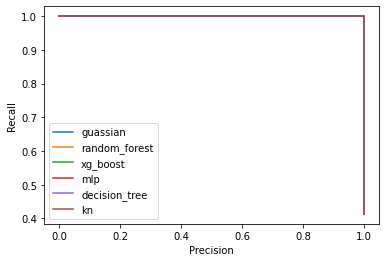

In [14]:
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(grecall,gprecision,label='guassian')
# plt.plot(mrecall,mprecision,label='multinomial')
plt.plot(rrecall,rprecision,label='random_forest')
plt.plot(xrecall,xprecision,label='xg_boost')
plt.plot(mlrecall,mlprecision,label='mlp')
# plt.plot(arecall,aprecision,label='ada_boost')
plt.plot(drecall,dprecision,label='decision_tree')
plt.plot(krecall,kprecision,label='kn')
# plt.plot(qrecall,qprecision,label='quadratic')
plt.legend()
plt.show()
#plt.savefig('garage_door_guassian_all.jpg', bbox_inches='tight')